In [1]:
import networkx as nx
import glob
import pandas as pd

In [2]:
import numpy as np

In [3]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import  write_to_file, test_kruskal

In [4]:
graphs = []
for filename in ['pd_graph.gml', 'auction_graph.gml', 'anarchy_graph.gml']:
    graphs.append(nx.read_gml('../data/networks/{}'.format(filename)))

In [5]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [6]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [7]:
def get_interval_of_distribution(distribution, interval=.95, reverse=False):
    
    distribution = np.sort(distribution)
    size = len(distribution)
    
    bound = int((size - interval * size))
    
    if reverse == True:
        distribution[bound:] 
    return distribution[:-bound] 

In [8]:
def fix_names_for_table(name):
    name = name.capitalize()
    return name[:2] + ' ' + name[2:].capitalize()

In [9]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import  write_to_file

# Centrality Measures

In [10]:
betweeness = [sorted(nx.betweenness_centrality(G).items(), 
              key=lambda x:x[1], reverse=True) for G in graphs]

In [11]:
closeness = [sorted(nx.closeness_centrality(G).items(), 
             key=lambda x:x[1], reverse=True) for G in graphs]

**PD central people**

In [12]:
bc_centrality = pd.DataFrame(betweeness[0][:10], columns=['Name', 'Betweeness'])
bc_centrality.Name = [fix_names_for_table(name) for name in bc_centrality.Name]

In [13]:
bc_centrality.index += 1 

In [14]:
bc_centrality

,Name,Betweeness
1,M. Perc,0.018903
2,Z. Wang,0.015962
3,L. Wang,0.014842
4,Y. Zhang,0.013178
5,M. Nowak,0.011588
6,H. Wang,0.008221
7,Y. Chen,0.008070
8,Y. Li,0.007993
9,Y. Moreno,0.007132
10,N. Masuda,0.006087


In [15]:
write_to_file(metric=bc_centrality.to_latex(), filename="central_authors.tex")

In [16]:
cc_centrality = pd.DataFrame(closeness[0][:10], columns=['Name', 'Closeness'])
cc_centrality.Name = [fix_names_for_table(name) for name in cc_centrality.Name]

In [17]:
cc_centrality.index += 1 

In [18]:
write_to_file(metric=cc_centrality.to_latex(), filename="central_authors_cc.tex")

Distributions
--------------

In [19]:
colors = ['darkorange', 'darkred', 'darkgreen']
labels = [r'$G_1$', r'$G_2$', r'$G_3$']

**Betweness**

In [20]:
distributions_betweeness = [[point[1] for point in coeff] for coeff in betweeness]

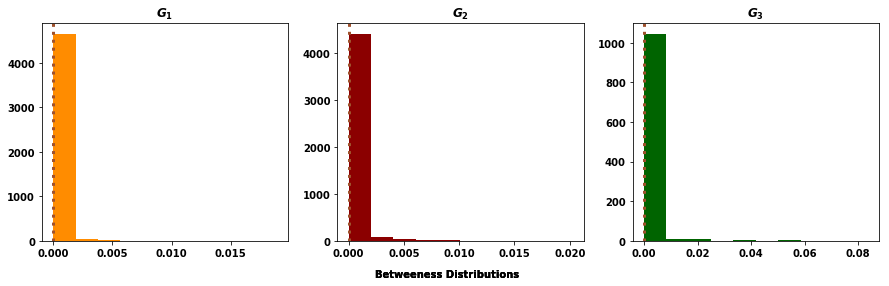

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_betweeness): 
    axes[i].hist(dstr,  color=colors[i]);
    axes[i].axvline(np.median(dstr), color='sienna', linestyle=':', linewidth=3, label='median')
    axes[i].title.set_text(labels[i])
    
    fig.text(0.5, 0.00, 'Betweeness Distributions', ha='center', fontsize=10)
    
plt.savefig('../../assets/images/betweeness_distributions.pdf')

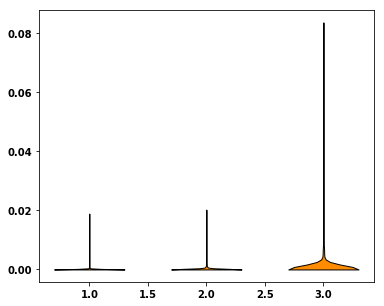

In [22]:
fig, axes = plt.subplots(figsize=(6, 5))
parts = plt.violinplot(distributions_betweeness, widths=.6, showmedians=False, showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

In [23]:
test_kruskal(distributions_betweeness)

1.5021810778164442e-16 The null hypothesis can be rejected.


In [24]:
nighty_five = [get_interval_of_distribution(dist, interval=.95) for dist in distributions_betweeness]

In [25]:
test_kruskal(nighty_five)

4.002808905102281e-21 The null hypothesis can be rejected.


In [26]:
# and do a Kruskall Wallis test again.

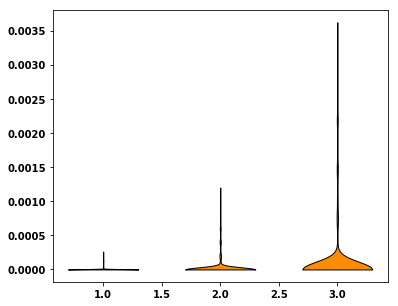

In [27]:
fig, axes = plt.subplots(figsize=(6, 5))
parts = plt.violinplot(nighty_five, widths=.6, showmedians=False, showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

**Closeness**

In [28]:
distributions_close = [[point[1] for point in coeff] for coeff in closeness]

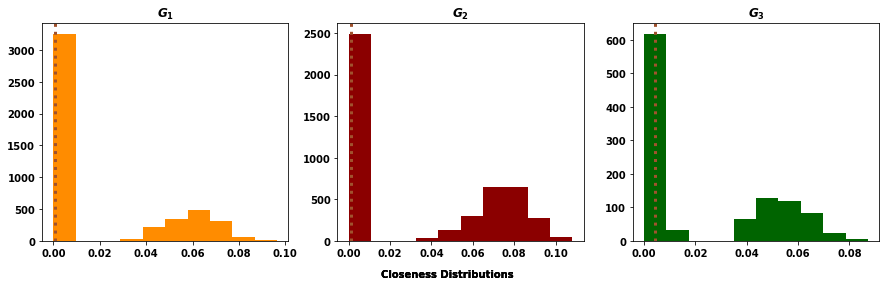

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
for i, dstr in enumerate(distributions_close): 
    axes[i].hist(dstr,  color=colors[i]);
    axes[i].axvline(np.median(dstr), color='sienna', linestyle=':', linewidth=3, label='median')
    axes[i].title.set_text(labels[i])
    
    fig.text(0.5, 0.00, 'Closeness Distributions', ha='center', fontsize=10)
    
plt.savefig('../../assets/images/closeness_distributions.pdf')

In [30]:
ipd = pd.read_json('../data/pd_November_2018_clean.json')
auction = pd.read_json('../data/auction_November_2018_clean.json')
anarchy = pd.read_json('../data/anarchy_November_2018_clean.json')

In [31]:
dataframes = [ipd, auction, anarchy]

In [32]:
central_names = [entry[0] for entry in closeness[2] if (entry[1] > 0.00) and (entry[1] < 0.02)]

In [33]:
anarchy[anarchy['author'].isin(central_names)]['provenance'].unique()

array(['PLOS', 'IEEE', 'Springer', 'arXiv', 'Nature'], dtype=object)

In [34]:
graphs[2]

In [35]:
len(list(graphs[2].neighbors(central_names[0])))

15

In [36]:
len(central_names)

647

In [37]:
subgraphs_of_anarchy = nx.connected_component_subgraphs(graphs[2])

In [38]:
check_complete = []
for G in subgraphs_of_anarchy:
    check_complete.append(nx.is_connected(G))

In [39]:
all(check_complete)

True

In [40]:
nx.draw(keep_graph[0], with_labels=True)

NameError: name 'keep_graph' is not defined

In [ ]:
nx.draw(keep_graph[0], with_labels=True)

In [ ]:
percentages = []
for i, data in enumerate(dataframes):
    central_names = [entry[0] for entry in closeness[i] if entry[1] > 0.02]
    percentages.append(len(central_names))

In [ ]:
central_names = [entry[0] for entry in closeness[1] if entry[1] > 0.02]

In [ ]:
auction[auction['author'].isin(central_names)]

In [ ]:
nighty_closeness = [get_interval_of_distribution(dist, interval=.90, reverse=True) for dist in distributions_close]

In [ ]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Closseness centrality')

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))
parts = plt.violinplot(distributions_close, widths=.6, showmedians=False, showextrema=False);

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
set_axis_style(axes, labels)

plt.savefig('../../assets/images/closeness_violins.pdf')

In [ ]:
test_kruskal(distributions_close)

**Over time**

In [ ]:
cum_graphs = []
for filename in glob.glob('../data/networks/G_pd*.gml'):
    cum_graphs.append(nx.read_gml(filename))

In [ ]:
betweeness = [sorted(nx.betweenness_centrality(G).items(), 
              key=lambda x:x[1], reverse=True) for G in cum_graphs]

In [ ]:
closeness = [sorted(nx.closeness_centrality(G).items(), 
             key=lambda x:x[1], reverse=True) for G in cum_graphs]

In [ ]:
distributions_betweeness = [[point[1] for point in between] for between in betweeness]
distributions_closeness = [[point[1] for point in between] for between in closeness]

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10))
parts = plt.violinplot(distributions_betweeness, widths=.6, showmedians=False,
                       showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor(colors[0])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    
axes.set_ylabel('Betweeness Centrality', fontsize=12)
axes.set_xlabel('Periods', fontsize=12);

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10))
parts = plt.violinplot(distributions_closeness, widths=.6, showmedians=False,
                       showextrema=False);

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)